In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

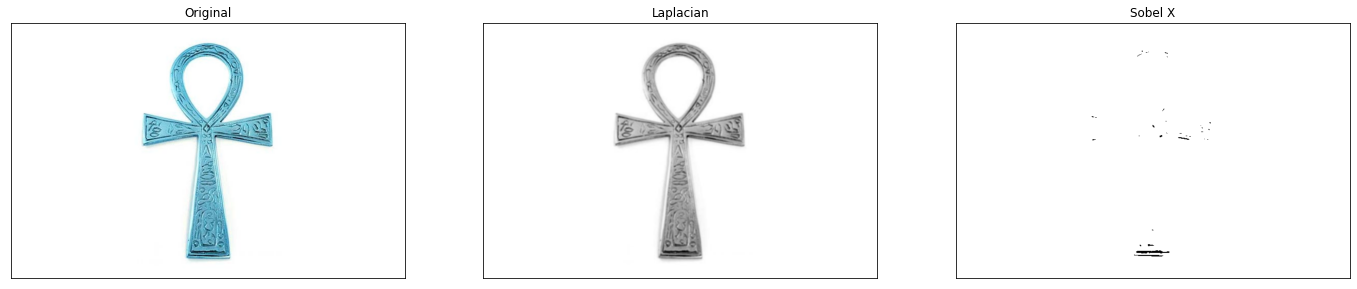

In [2]:
im = cv2.imread('The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,100,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)
 
kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

In [4]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)
 
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

{'m00': 319.5, 'm10': 122237.33333333333, 'm01': 143353.16666666666, 'm20': 46869810.75, 'm11': 54845872.541666664, 'm02': 64320425.25, 'm30': 18010946031.7, 'm21': 21029904185.6, 'm12': 24608730573.066666, 'm03': 28859958958.550003, 'mu20': 103095.06785776466, 'mu11': 461.5300165191293, 'mu02': 768.3067727386951, 'mu30': 164146.66868972778, 'mu21': 18037.0027538985, 'mu12': -522.4098909441964, 'mu03': -100.4541015625, 'nu20': 1.0099413731624352, 'nu11': 0.004521246926012909, 'nu02': 0.0075264977577807176, 'nu30': 0.08996113312217421, 'nu21': 0.00988523994316084, 'nu12': -0.0002863084954371199, 'nu03': -5.505420777325833e-05}
